## VISUALIZATIONS
Visualizations Notebook for Project AnomaData

### Objective:

To perform a comprehensive visual exploration of the dataset to:

- Understand feature distributions and relationships.
- Investigate time-based trends.
- Explore class imbalances and feature correlations.
- Identify patterns and outliers to guide further feature engineering and modeling.


Importing Necessary Libraries for Vizualizations

In [41]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# To suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [42]:
# Mounting  Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 1. Data Loading and Overview

Objective: Load the dataset, inspect its structure, and check for missing values or duplicates.

In [43]:
# Loading the dataset
file_path = '/content/drive/MyDrive/Project AnomaData/AnomaData.xlsx'
df = pd.read_excel(file_path)

# Displaying a preview of the dataset
print("\nSample Data:")
display(df.head())


Sample Data:


time  y        x1        x2        x3         x4        x5  \
0 1999-05-01 00:00:00  0  0.376665 -4.596435 -4.095756  13.497687 -0.118830   
1 1999-05-01 00:02:00  0  0.475720 -4.542502 -4.018359  16.230659 -0.128733   
2 1999-05-01 00:04:00  0  0.363848 -4.681394 -4.353147  14.127997 -0.138636   
3 1999-05-01 00:06:00  0  0.301590 -4.758934 -4.023612  13.161566 -0.148142   
4 1999-05-01 00:08:00  0  0.265578 -4.749928 -4.333150  15.267340 -0.155314   

          x6        x7        x8  ...        x51        x52       x54  \
0 -20.669883  0.000732 -0.061114  ...  29.984624  10.091721 -4.936434   
1 -18.758079  0.000732 -0.061114  ...  29.984624  10.095871 -4.937179   
2 -17.836632  0.010803 -0.061114  ...  29.984624  10.100265 -4.937924   
3 -18.517601  0.002075 -0.061114  ...  29.984624  10.104660 -4.938669   
4 -17.505913  0.000732 -0.061114  ...  29.984624  10.109054 -4.939414   

         x55        x56       x57       x58       x59       x60  y.1  
0 -24.590146  18.515436  3.473400  0.033444  0.953219  0.006076    0  
1 -32.413266  22.760065  2.682933  0.033536  1.090502  0.006083    0  
2 -34.183774  27.004663  3.537487  0.033629  1.840540  0.006090    0  
3 -35.954281  21.672449  3.986095  0.033721  2.554880  0.006097    0  
4 -37.724789  21.907251  3.601573  0.033777  1.410494  0.006105    0  

[5 rows x 62 columns]

In [ ]:
# Checking for missing values
print("\nMissing Values:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# Checking for duplicate rows
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Missing Values:
Series([], dtype: int64)

Number of duplicate rows: 0


### 2. Target Variable Distribution

Objective: Explore the distribution of the target variable (y) to assess class imbalance.

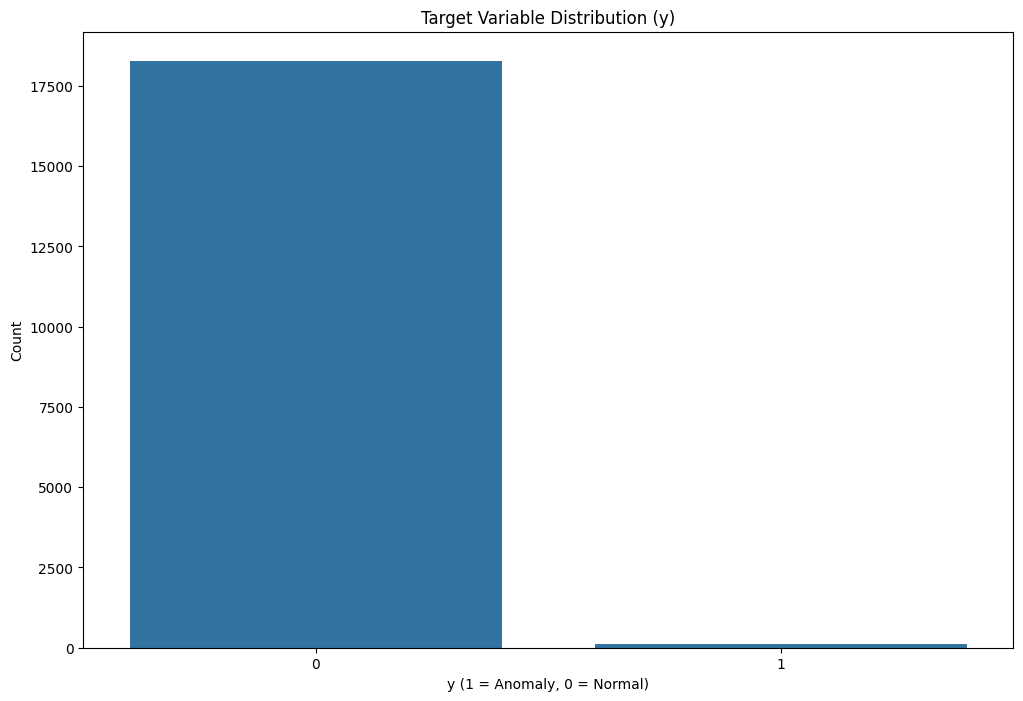


Class Distribution (Target Variable 'y'):
y
0    18274
1      124
Name: count, dtype: int64


In [ ]:
# Target variable distribution
plt.figure(figsize=(12, 8))
sns.countplot(x='y', data=df)
plt.title("Target Variable Distribution (y)")
plt.xlabel("y (1 = Anomaly, 0 = Normal)")
plt.ylabel("Count")
plt.show()

# Value counts
print("\nClass Distribution (Target Variable 'y'):")
print(df['y'].value_counts())

### 3. Time-Based Analysis

Objective: To explore time-based trends in anomalies.

#### Time Series Trends (Anomalies Over Time)

Objective:
- To explore how anomalies vary over time.

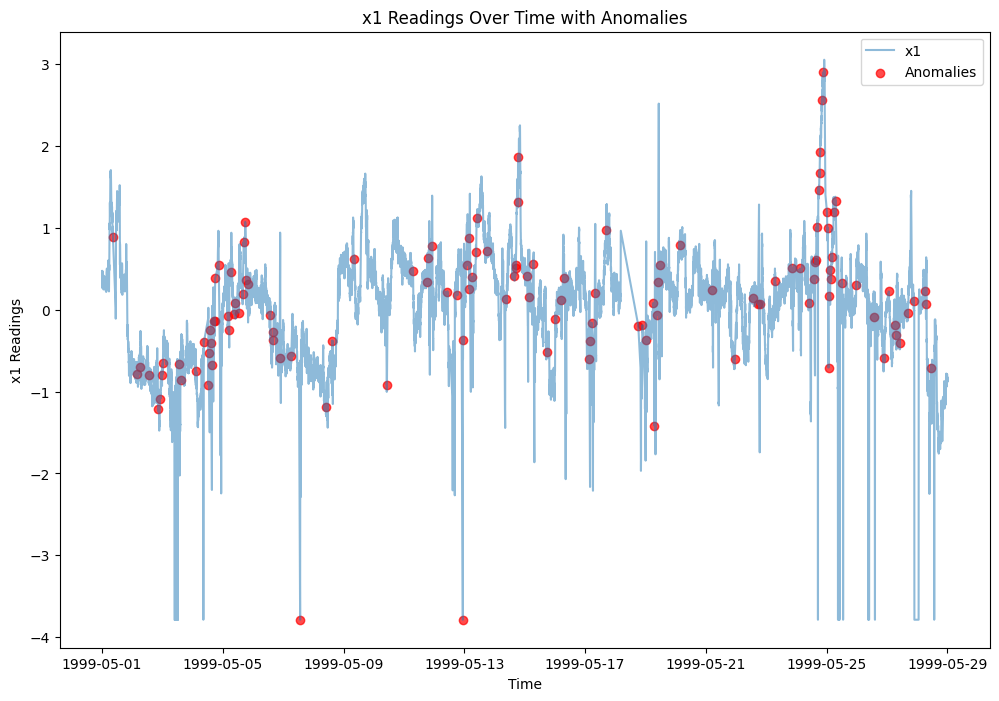

In [ ]:
# Converting 'time' column to datetime format
df['time'] = pd.to_datetime(df['time'])

# Plotting anomalies over time
anomalies = df[df['y'] == 1]
plt.figure(figsize=(12, 8))
plt.plot(df['time'], df['x1'], label='x1', alpha=0.5)
plt.scatter(anomalies['time'], anomalies['x1'], color='red', label='Anomalies', alpha=0.7)
plt.title("x1 Readings Over Time with Anomalies")
plt.xlabel("Time")
plt.ylabel("x1 Readings")
plt.legend()
plt.show()

#### 2. Hourly Trends in Anomalies

Objective: To detect time-of-day patterns in anomalies.

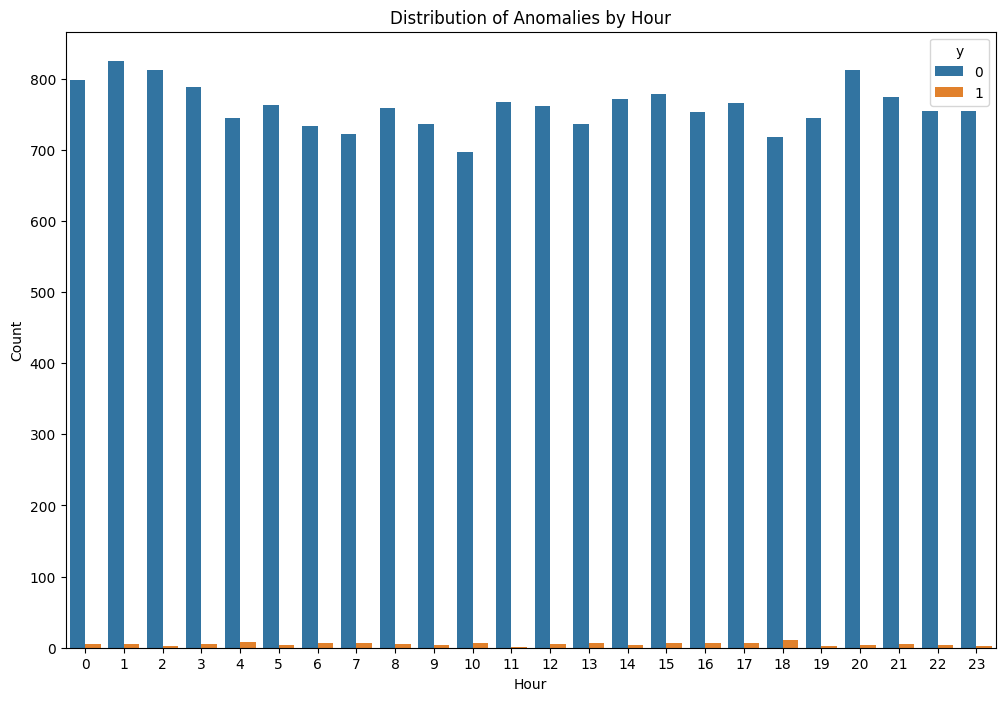

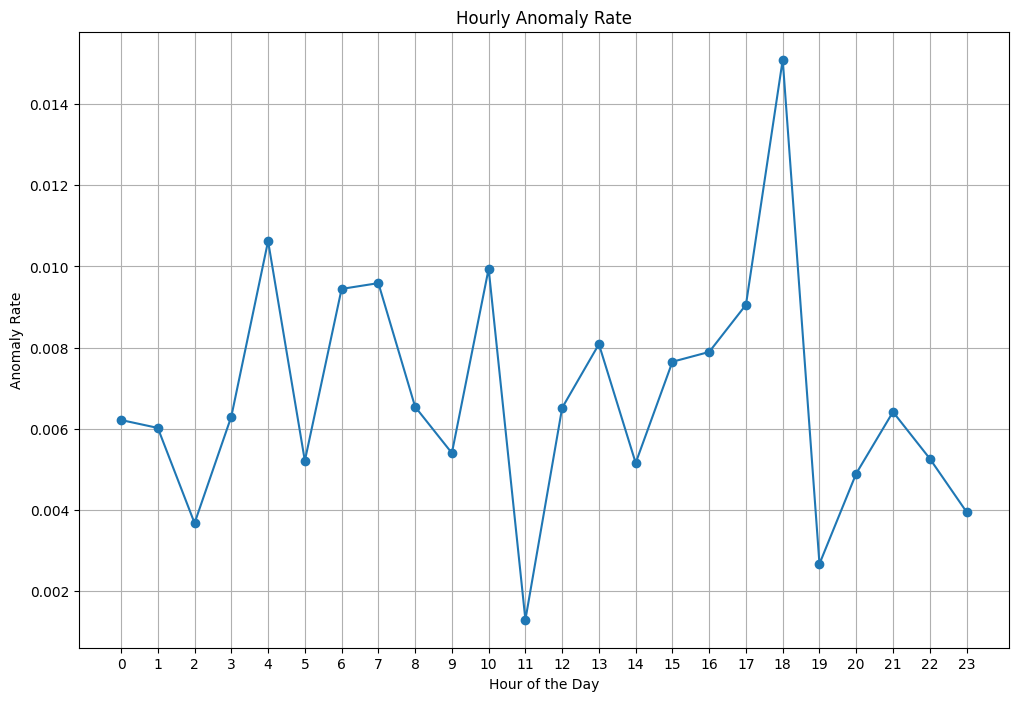

In [ ]:
# Extracting time-based features
df['hour'] = df['time'].dt.hour
df['day_of_week'] = df['time'].dt.dayofweek
df['day_of_month'] = df['time'].dt.day

# Distribution of anomalies by hour
plt.figure(figsize=(12, 8))
sns.countplot(x='hour', hue='y', data=df)
plt.title("Distribution of Anomalies by Hour")
plt.xlabel("Hour")
plt.ylabel("Count")
plt.legend(title="y")
plt.show()

# Aggregating data based on time intervals (e.g., hours)
hourly_data = df.groupby(df['time'].dt.hour)['y'].mean()

# Visualizing the relationship between time and anomalies
plt.figure(figsize=(12, 8))
hourly_data.plot(kind='line', marker='o')
plt.title('Hourly Anomaly Rate')
plt.xlabel('Hour of the Day')
plt.ylabel('Anomaly Rate')
plt.xticks(range(24))  # Setting x-axis ticks to show all hours
plt.grid(True)
plt.show()

#### 3.3 Weekly Trends in Anomalies

Objective: To check for weekly trends in anomalies.

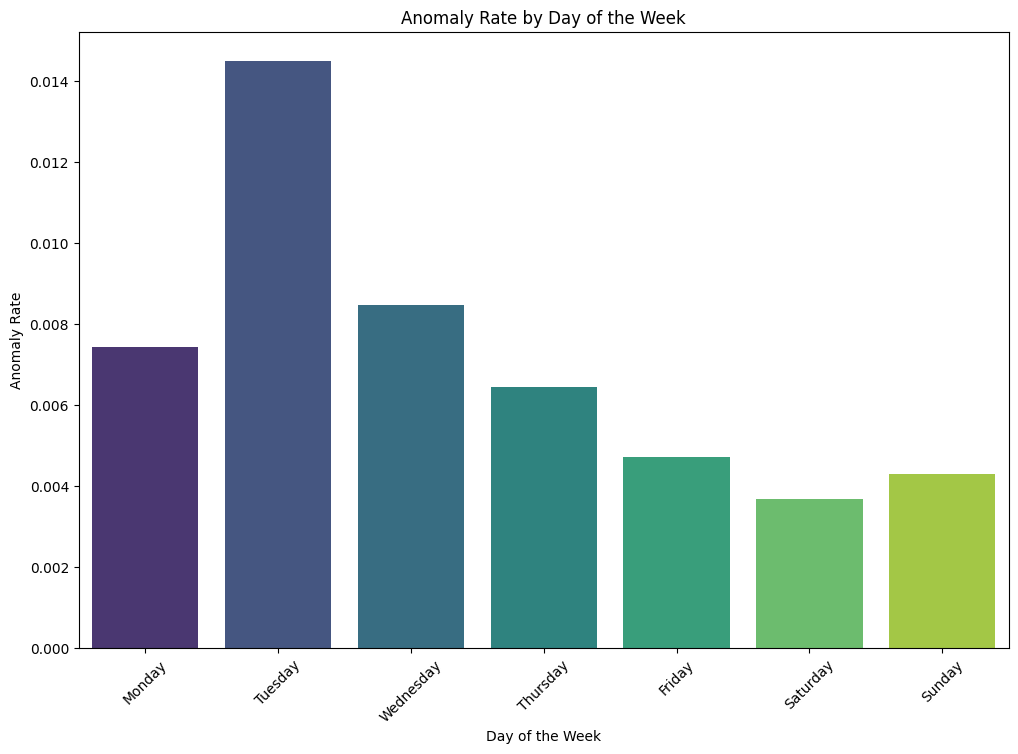

In [ ]:
# Aggregating anomalies by day of the week
weekly_anomalies = df.groupby('day_of_week')['y'].mean()

# Plotting weekly anomalies
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(12, 8))
sns.barplot(x=days, y=weekly_anomalies.values, palette="viridis")
plt.title("Anomaly Rate by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Anomaly Rate")
plt.xticks(rotation=45)
plt.show()

#### 3.4. Heatmap of Anomalies Across Time (Hourly and Daily Patterns)

Objective: To visualize how anomalies occur across hours and days.

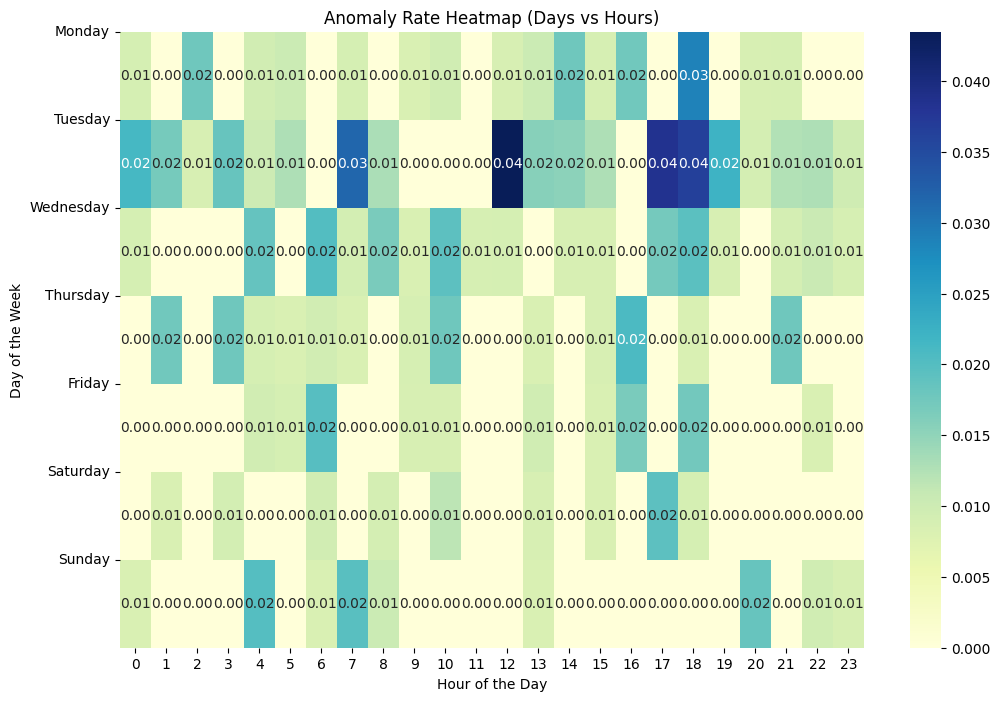

In [ ]:
# Creating a pivot table for heatmap
heatmap_data = df.pivot_table(index=df['time'].dt.weekday, columns=df['time'].dt.hour, values='y', aggfunc='mean')

# Plotting heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".2f", cbar=True)
plt.title("Anomaly Rate Heatmap (Days vs Hours)")
plt.xlabel("Hour of the Day")
plt.ylabel("Day of the Week")
plt.yticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=0)
plt.show()

### 4. Correlation Analysis

Objective: To explore relationships between numerical features.

##### 4.1: Correlation Heatmap of All Features

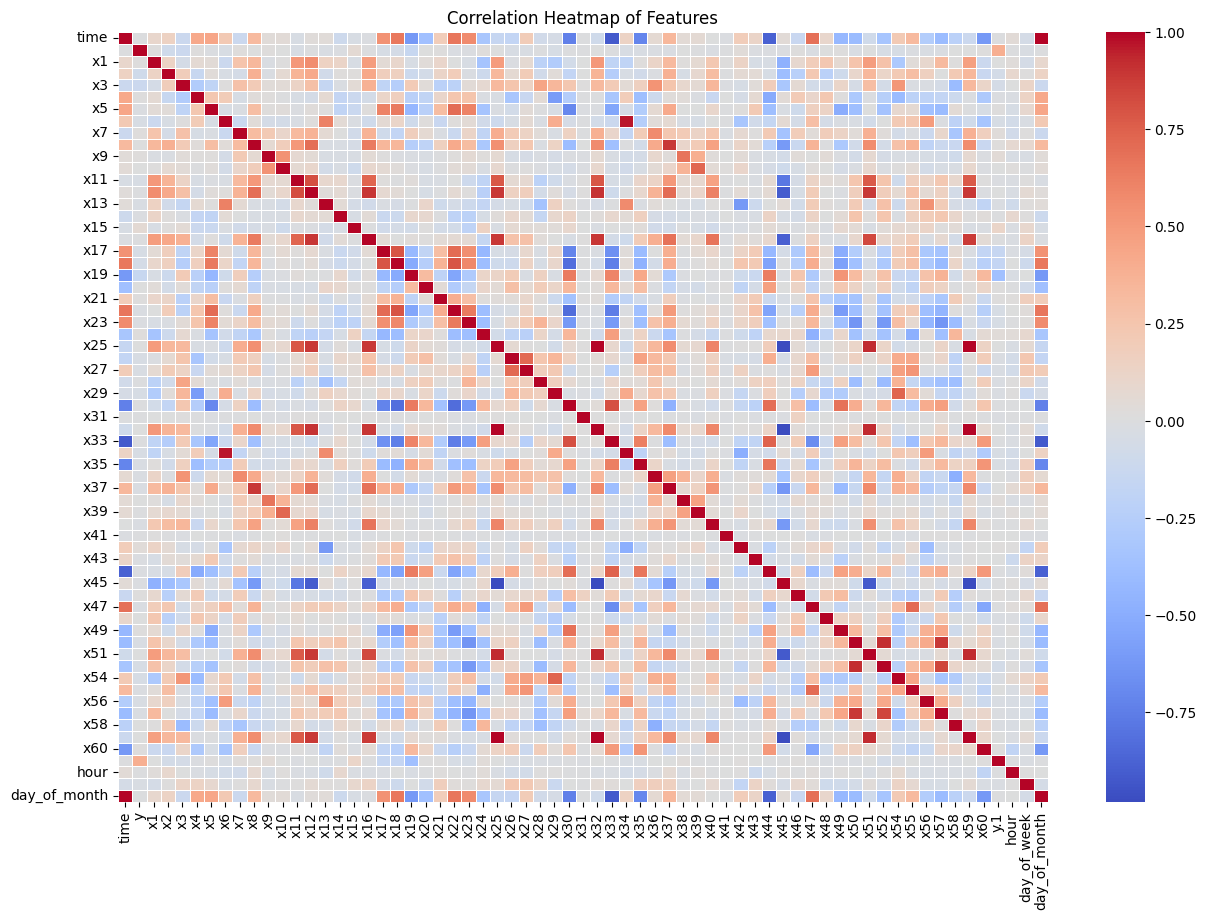

In [ ]:
# Computing correlation matrix
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()

#### 4.2. Correlation Heatmap

Objective: Analyze relationships between numerical features and the target variable.

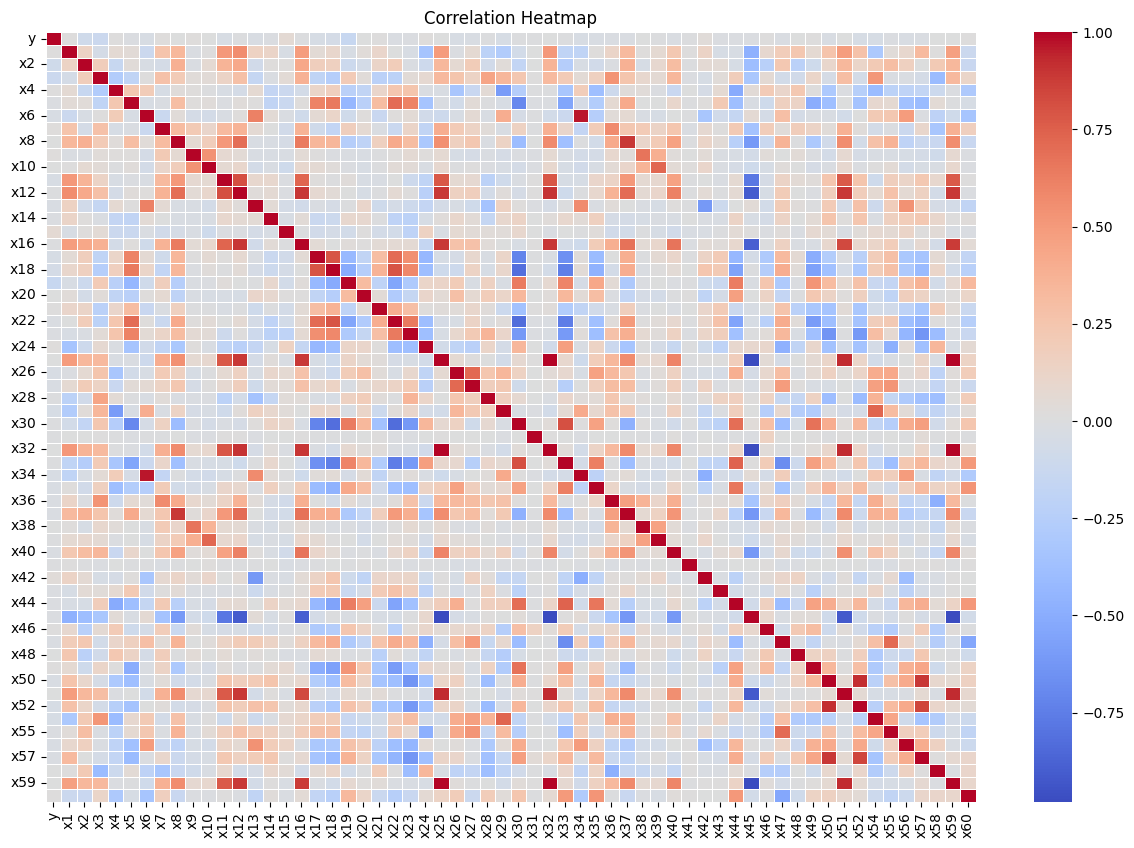


Correlations with Target Variable (y):
y      1.000000
x15    0.058647
x42    0.034149
x9     0.024217
x24    0.023117
x7     0.018346
x4     0.016792
x60    0.016083
x21    0.015817
x46    0.012870
x49    0.012514
x1     0.010227
x59    0.009165
x38    0.008346
x25    0.008187
x51    0.007895
x32    0.007576
x48    0.006628
x20    0.005401
x58    0.005083
x10    0.003178
x8     0.002983
x28    0.000092
x30   -0.001254
x16   -0.001329
x39   -0.002476
x12   -0.003092
x41   -0.003802
x33   -0.004383
x31   -0.005359
x5    -0.006161
x44   -0.007857
x14   -0.008082
x45   -0.008368
x23   -0.008410
x43   -0.008513
x55   -0.013450
x40   -0.016228
x36   -0.016998
x47   -0.017167
x57   -0.017802
x22   -0.018220
x37   -0.019723
x35   -0.021424
x13   -0.023698
x56   -0.024917
x27   -0.025215
x50   -0.025812
x26   -0.032704
x6    -0.033487
x34   -0.034436
x11   -0.035734
x29   -0.039369
x52   -0.041135
x54   -0.041177
x17   -0.043873
x18   -0.056908
x2    -0.090961
x3    -0.116369
x19   -0.140868


In [ ]:
# Correlation matrix
correlation_matrix = df.drop(columns=['time','y.1', 'hour','day_of_week','day_of_month']).corr()

# Plotting heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, linewidths=0.5,cbar=True)
plt.title("Correlation Heatmap")
plt.show()

# Highlighting correlations with target variable
correlation_with_target = correlation_matrix['y'].sort_values(ascending=False)
print("\nCorrelations with Target Variable (y):")
print(correlation_with_target)

### 5. Feature Distributions

Objective: Explore the distributions of key features.

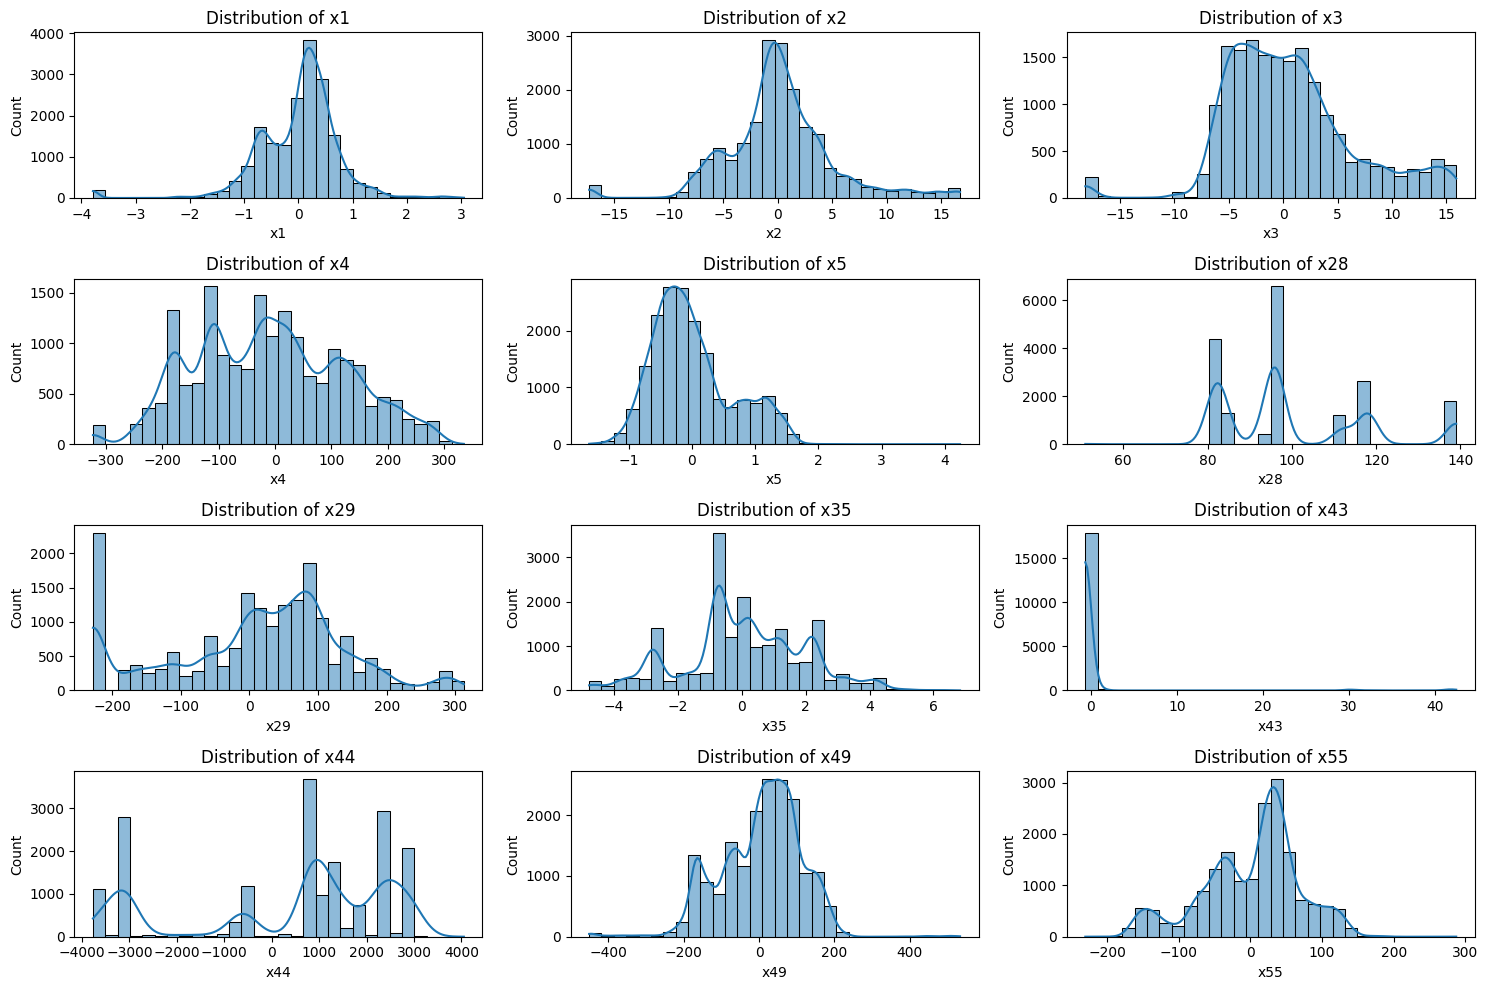

In [ ]:
# Plotting histograms for selected features
selected_features = ['x1', 'x2', 'x3', 'x4', 'x5', 'x28','x29','x35', 'x43','x44','x49', 'x55']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f"Distribution of {feature}")
plt.tight_layout()
plt.show()

### 6. Pairwise Relationships

Objective: To visualize relationships between key features and the target variable.

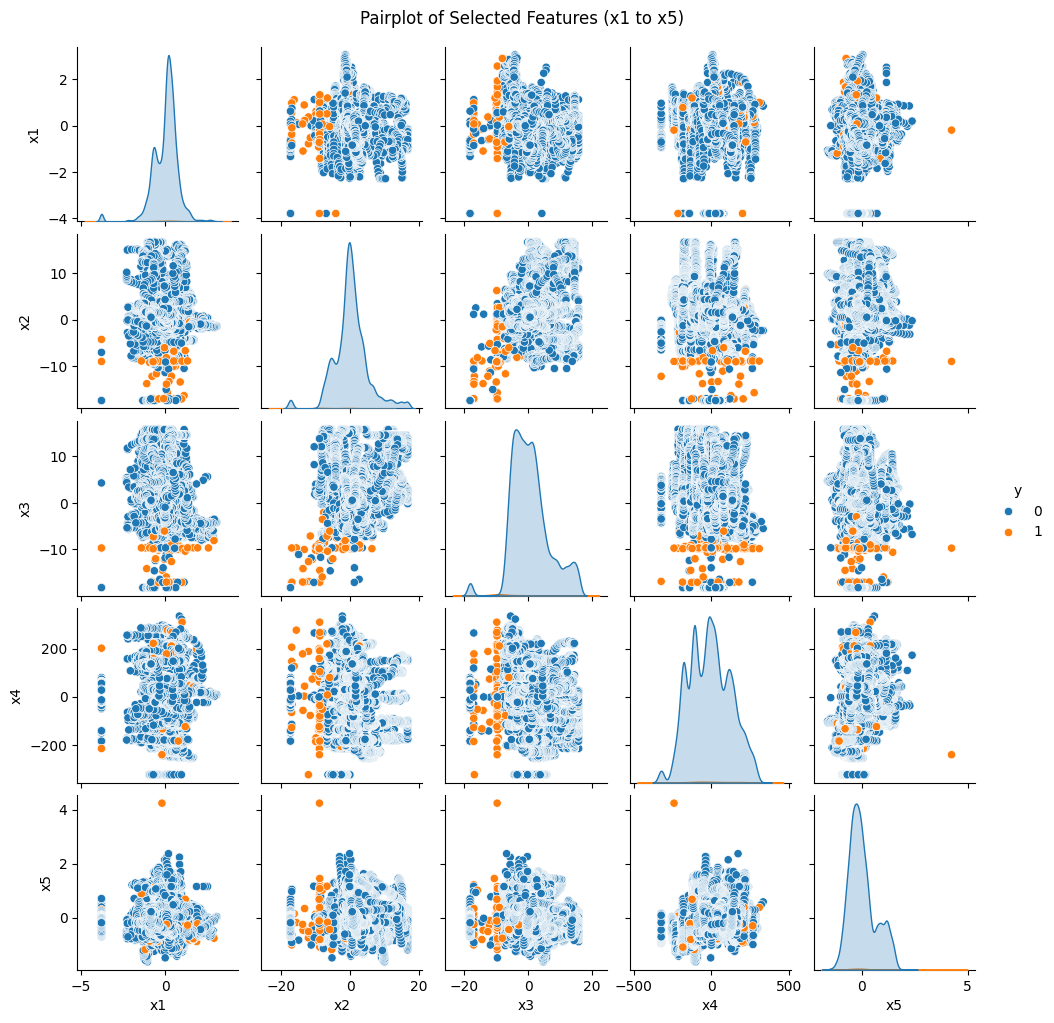

In [ ]:
# Pairplot for selected features
key_features = ['x1', 'x2', 'x3', 'x4', 'x5', 'y']
sns.pairplot(df[key_features], hue='y', diag_kind='kde', height=2)
plt.suptitle("Pairplot of Selected Features (x1 to x5)", y=1.02)
plt.show()

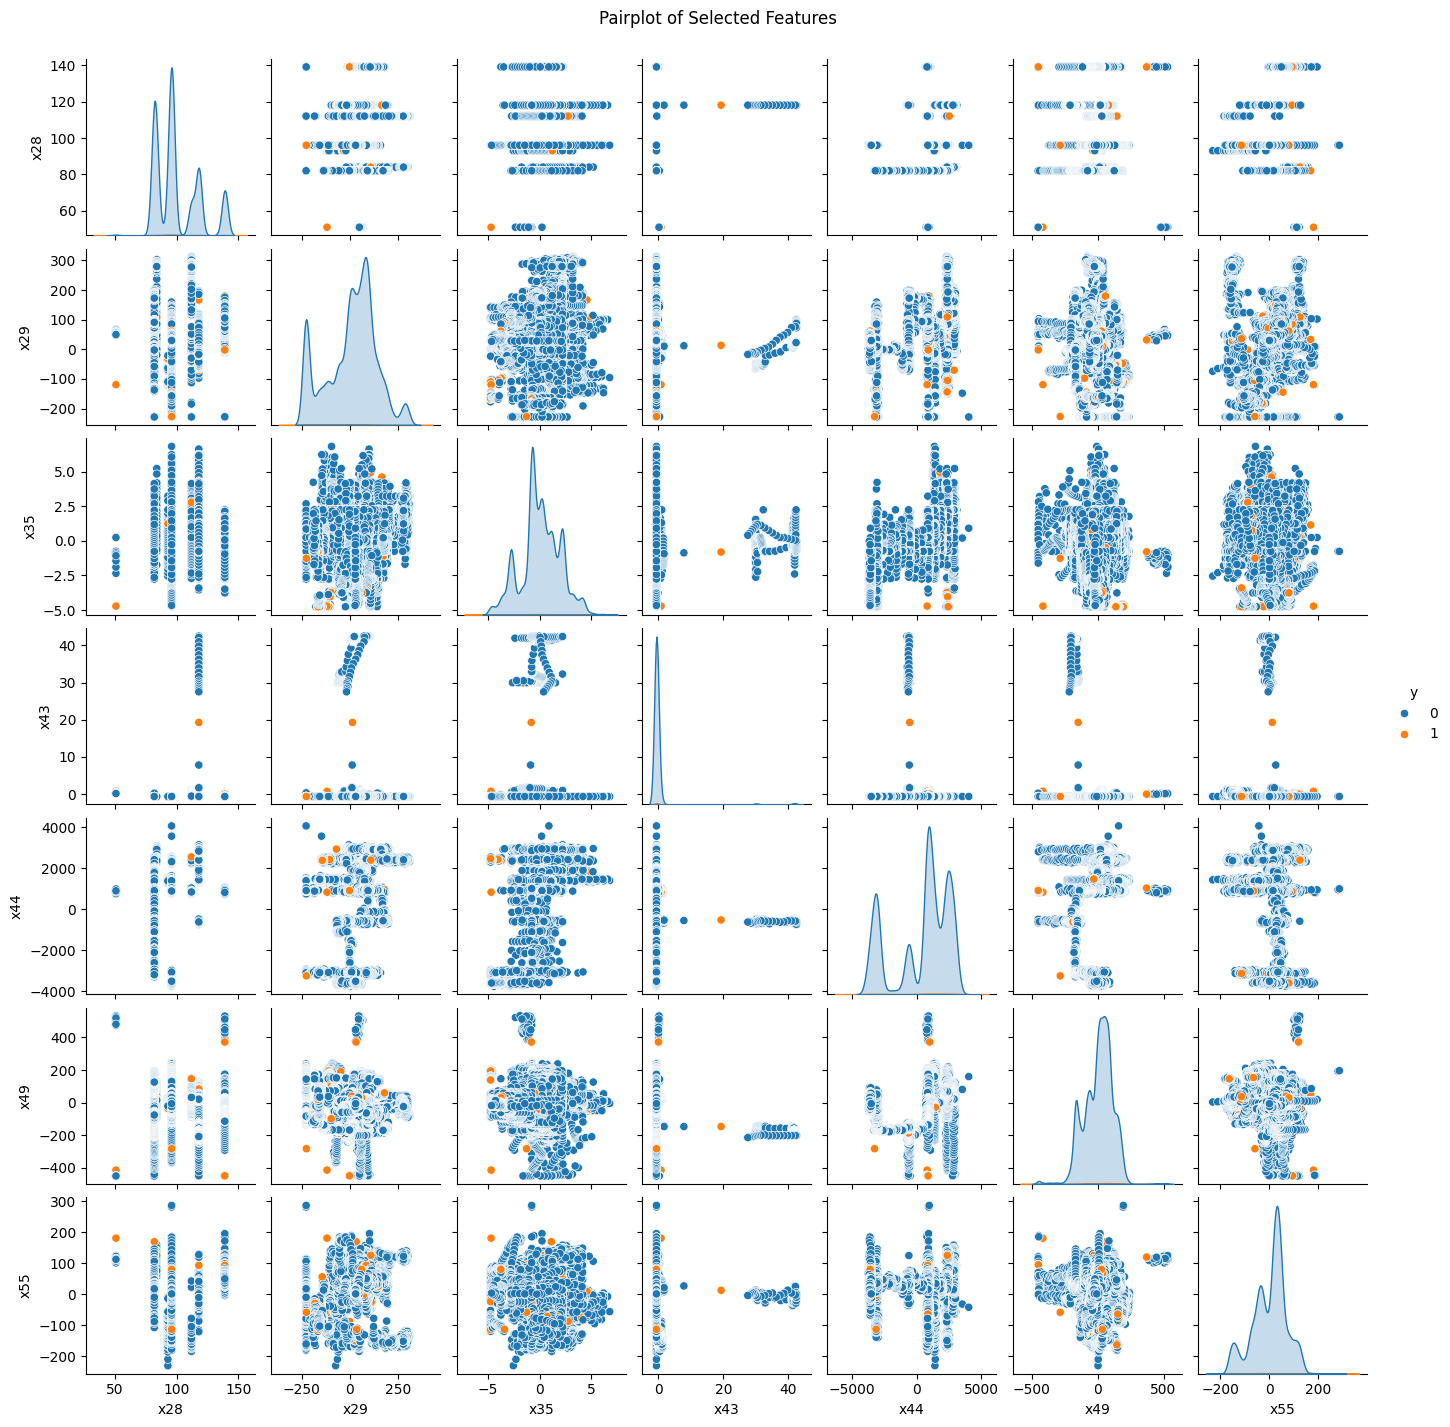

In [ ]:
some_features = ['x28','x29','x35', 'x43','x44','x49', 'x55', 'y']

sns.pairplot(df[some_features], hue='y', diag_kind='kde', height=2)
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

### 7. Outlier Detection

Objective: Detect and visualize potential outliers using boxplots.

In [ ]:
df.columns

Index(['time', 'y', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19',
       'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29',
       'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39',
       'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49',
       'x50', 'x51', 'x52', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60',
       'y.1', 'hour', 'day_of_week', 'day_of_month'],
      dtype='object')

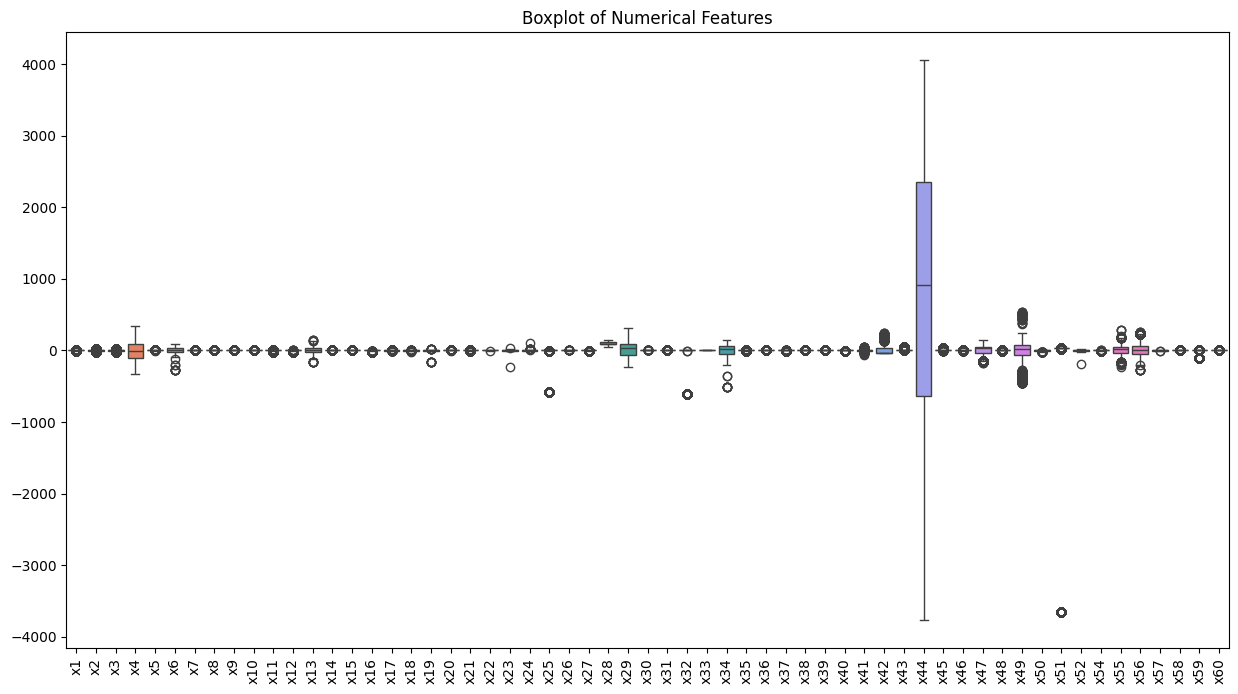

In [ ]:
# Boxplot for all numerical features
plt.figure(figsize=(15, 8))
sns.boxplot(data=df.drop(columns=['time', 'y', 'y.1', 'hour', 'day_of_week', 'day_of_month']))
plt.xticks(rotation=90)
plt.title("Boxplot of Numerical Features")
plt.show()

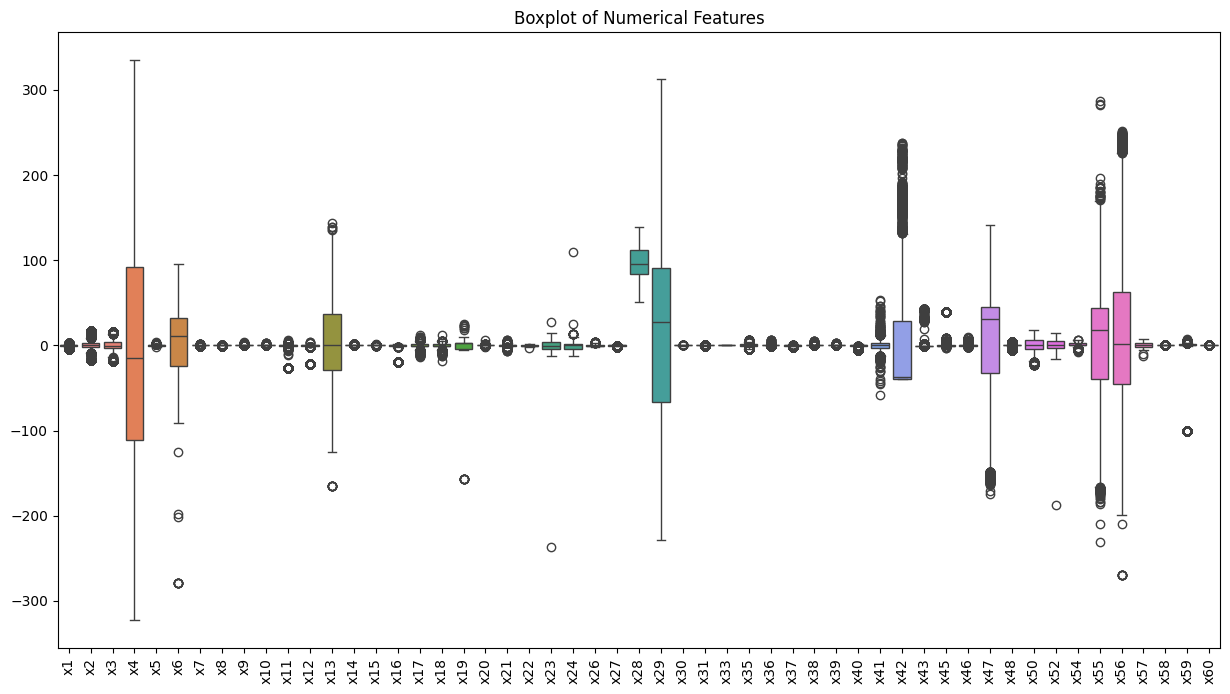

In [ ]:
# Boxplot for numerical features (excluding some)
plt.figure(figsize=(15, 8))
sns.boxplot(data=df.drop(columns=['time', 'y', 'y.1', 'hour', 'day_of_week', 'day_of_month', 'x44','x51', 'x25', 'x32','x34', 'x49']))
plt.xticks(rotation=90)
plt.title("Boxplot of Numerical Features")
plt.show()

### 8. Feature-Target Relationship

Objective: Highlight anomalies for specific features using scatterplots and 3D plots.

- 8.1.  Scatterplot for key feature relationships
- 8.2. Boxplot for feature distribution by target
- 8.3. Scatterplot for x1 and x2, highlighting anomalies


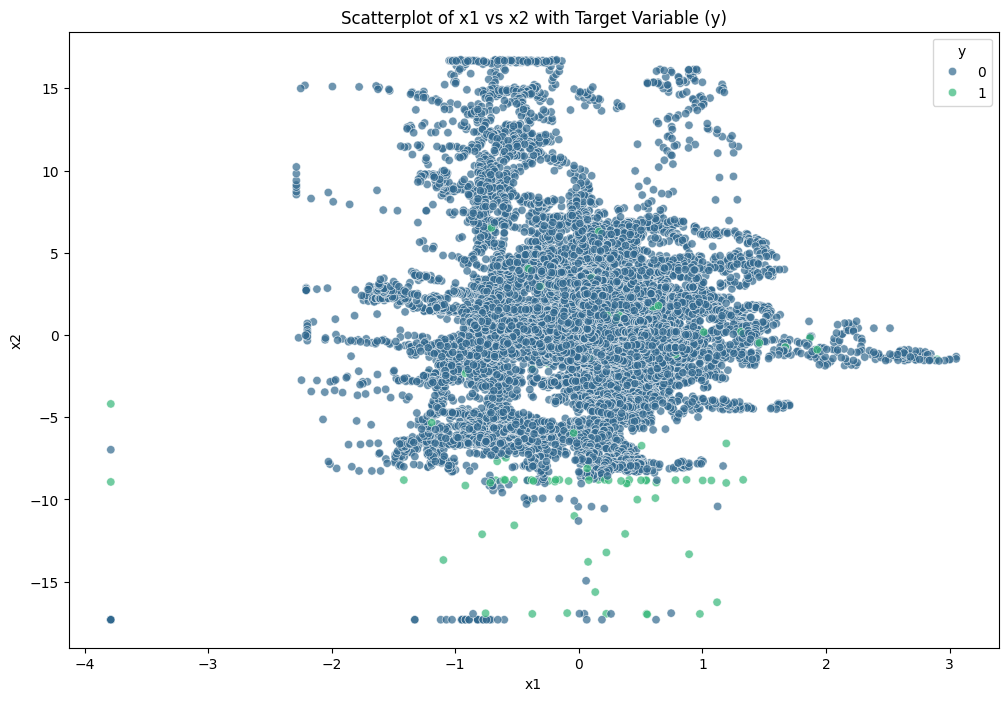

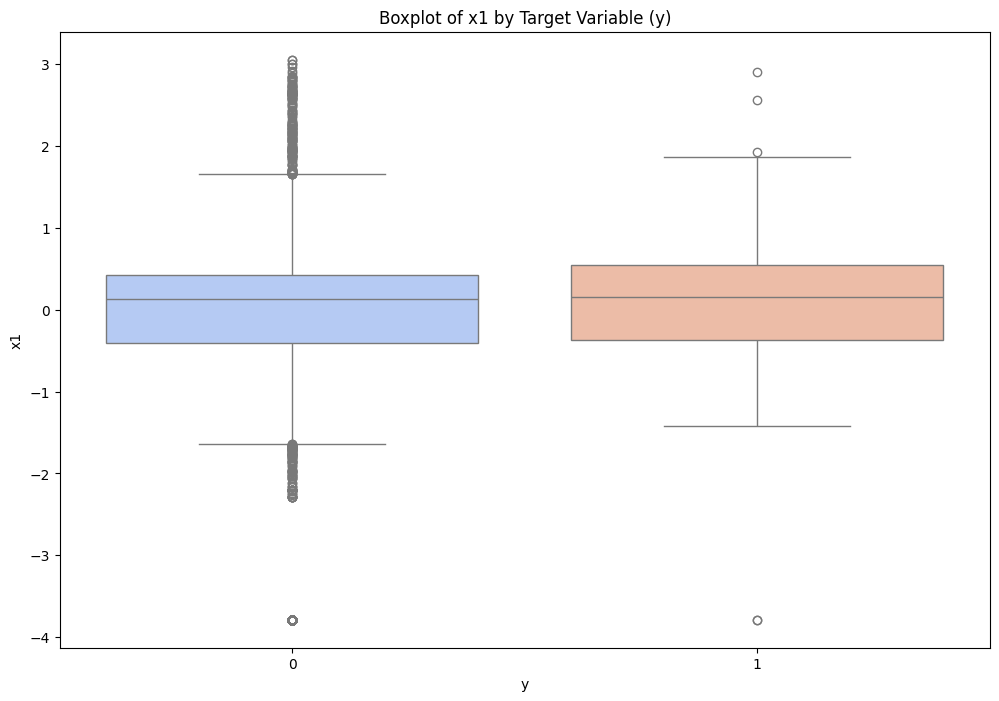

In [ ]:
# 8.1 Scatterplot for selected feature relationships
plt.figure(figsize=(12, 8))
sns.scatterplot(x='x1', y='x2', hue='y', data=df, alpha=0.7, palette='viridis')
plt.title("Scatterplot of x1 vs x2 with Target Variable (y)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(title="y")
plt.show()

# 8.2 Boxplot for feature distribution by target
plt.figure(figsize=(12, 8))
sns.boxplot(x='y', y='x1', data=df, palette='coolwarm')
plt.title("Boxplot of x1 by Target Variable (y)")
plt.xlabel("y")
plt.ylabel("x1")
plt.show()

# 8.3 Scatterplot for x1 and x2, highlighting anomalies
plt.figure(figsize=(12, 8))
plt.scatter(df['x1'], df['x2'], alpha=0.5, label='Normal')
plt.scatter(anomalies['x1'], anomalies['x2'], color='red', label='Anomalies', alpha=0.8)
plt.title("Scatterplot of x1 vs x2 with Anomalies Highlighted")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

### 9. Distribution of Aggregated Features

Objective: Analyze trends in feature averages over time or by hour/day.

- 9.1. Aggregating Features by Time
- 9.2. Aggregating Features by Day of the Week

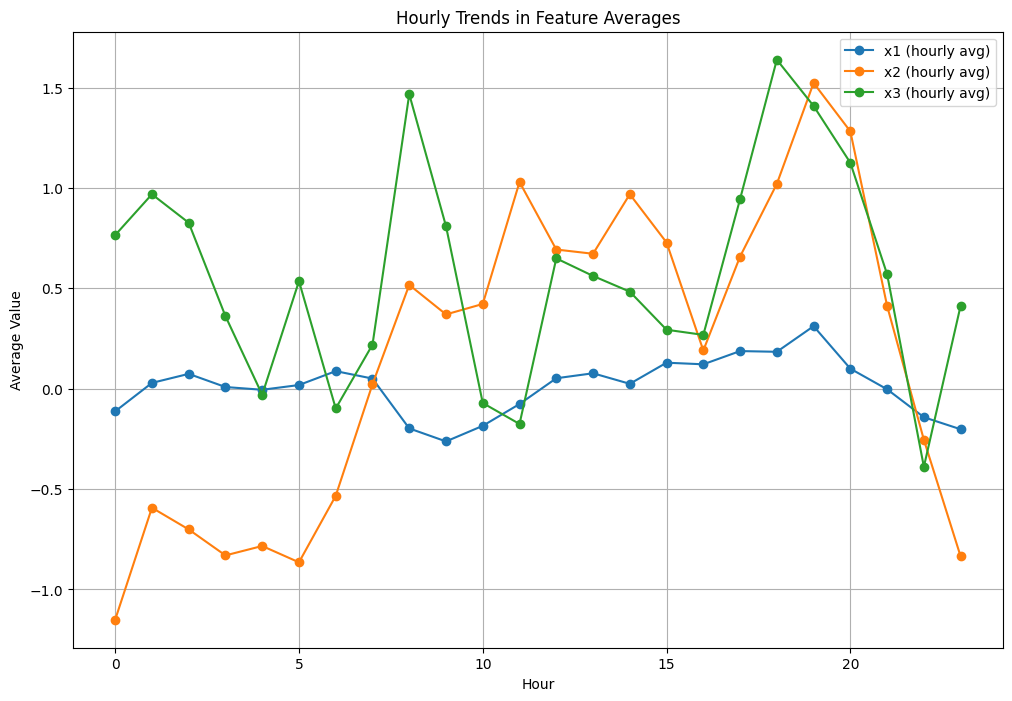

In [ ]:
# 9.1. Aggregating features by hour
hourly_aggregation = df.groupby('hour').mean()

# Plotting aggregated features over hours
plt.figure(figsize=(12, 8))
for feature in ['x1', 'x2', 'x3']:
    plt.plot(hourly_aggregation.index, hourly_aggregation[feature], marker='o', label=f"{feature} (hourly avg)")

plt.title("Hourly Trends in Feature Averages")
plt.xlabel("Hour")
plt.ylabel("Average Value")
plt.legend()
plt.grid(True)
plt.show()

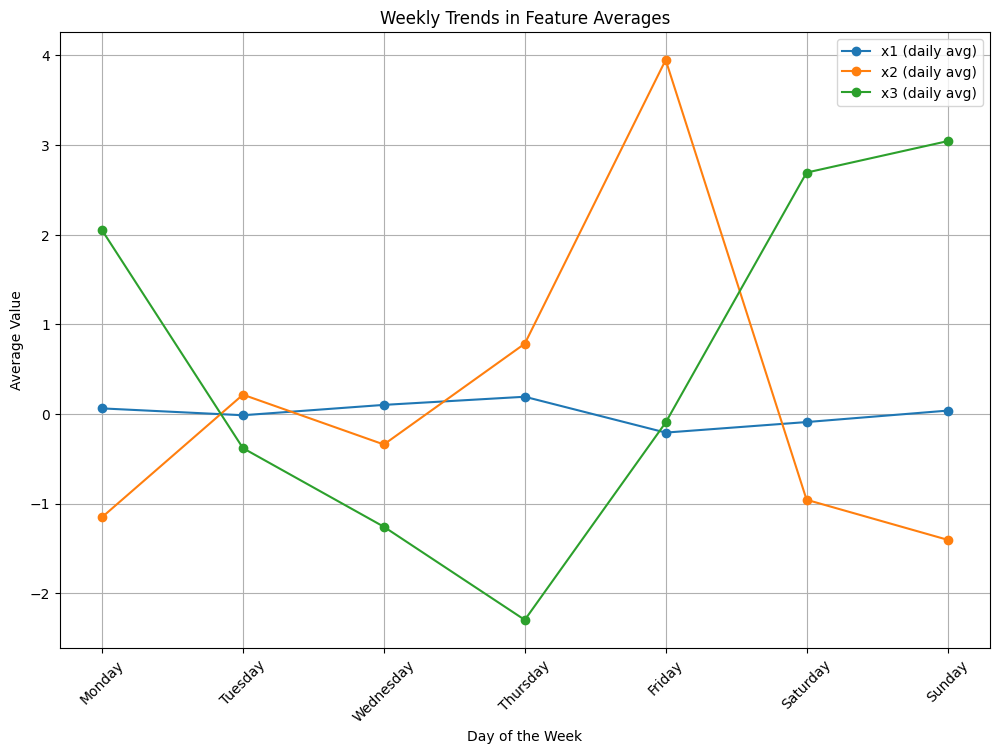

In [ ]:
# 9.2. Aggregating Features by Day of the Week
daily_aggregation = df.groupby('day_of_week').mean()

# Plotting aggregated features over days of the week
plt.figure(figsize=(12, 8))
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for feature in ['x1', 'x2', 'x3']:
    plt.plot(daily_aggregation.index, daily_aggregation[feature], marker='o', label=f"{feature} (daily avg)")

plt.title("Weekly Trends in Feature Averages")
plt.xlabel("Day of the Week")
plt.ylabel("Average Value")
plt.xticks(ticks=range(7), labels=days, rotation=45)
plt.legend()
plt.grid(True)
plt.show()

#### 10. Feature Clustering
Objective: Use clustering techniques (e.g., K-Means) to explore feature groupings.

- Performing K-Means Clustering

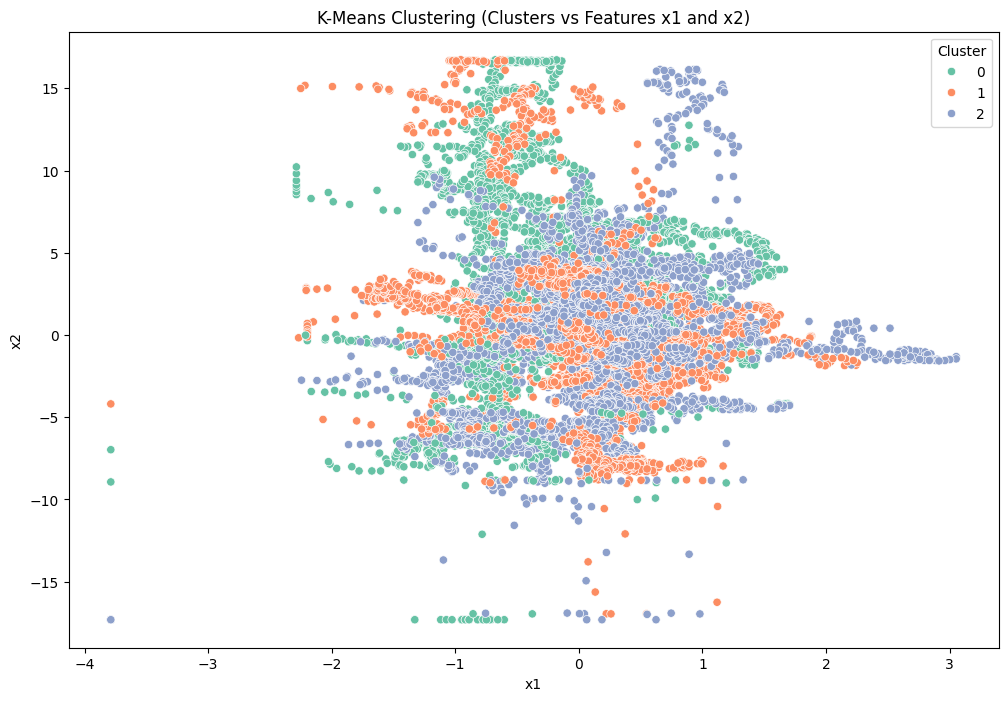

In [ ]:
from sklearn.cluster import KMeans

# Selecting features for clustering
clustering_features = ['x1', 'x2', 'x3', 'x4', 'x5']
X_clustering = df[clustering_features]

# Fitting K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_clustering)

# Visualizing clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='x1', y='x2', hue='cluster', data=df, palette='Set2')
plt.title("K-Means Clustering (Clusters vs Features x1 and x2)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(title="Cluster")
plt.show()

Clustering with Anomaly Labels

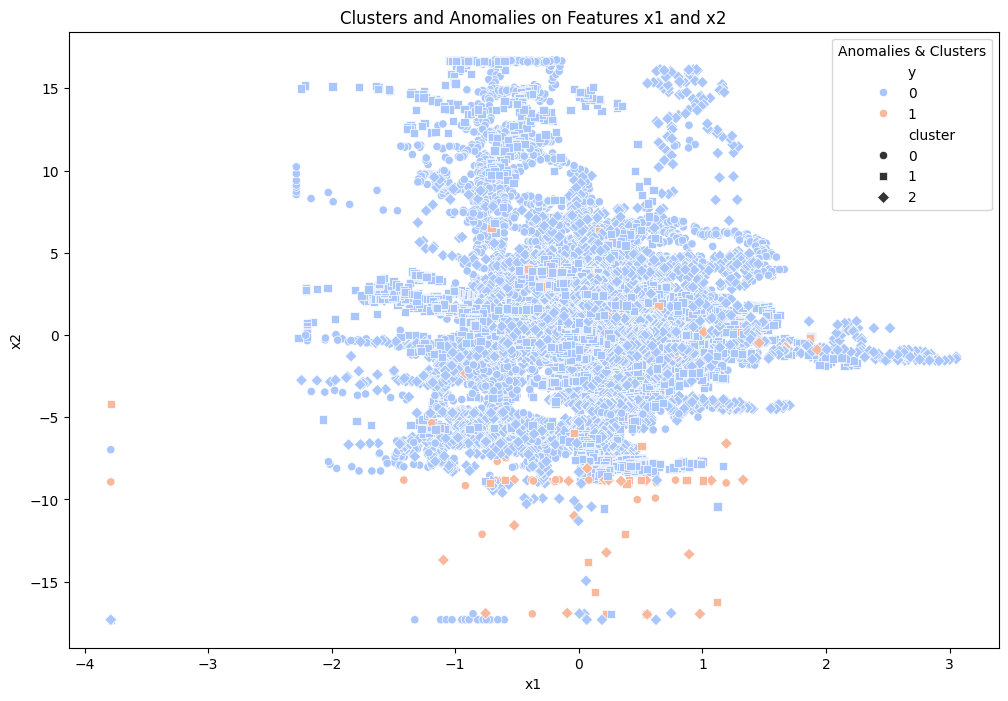

In [ ]:
# Adding anomaly information to clustering visualization
plt.figure(figsize=(12, 8))
sns.scatterplot(x='x1', y='x2', hue='y', style='cluster', data=df, palette='coolwarm', markers=['o', 's', 'D'])
plt.title("Clusters and Anomalies on Features x1 and x2")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(title="Anomalies & Clusters")
plt.show()